## ECSE 415, Assignment 3 / part 2

 


In [21]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## 3.1 Multi-resolution Lucas-Kanade optic flow detection

    • Extract good points to track from ‘frame1.png’ using Harris corner de- tection algorithm. Use openCV function 
      goodFeaturesToTrack and set parameter value maxCorners=500. Search optimal values for the rest of the  
      parameters. Let us call the detected set of points: p1. (2 points)
      
    • Compute the optical flow between ‘frame1.png’ and ‘frame2.png’ at the points in p1. Use the openCV function 
      calcOpticalFlowPyrLK. Search for optimal values for the parameters. (2 points)
      Note that the function calcOpticalFlowPyrLK returns nextPts (a set of shifted positions of each point in p1 
      which we refer as p2), status (whether the search of shifted position is successful or not) and err (error 
      measure between p1 and p2). Please read the manual for more details 1.)
      
    • Display the optical flow image. (1 point)
    
    • Varythemaximumpyramidlevelfrom0to10inthefunctioncalcOpticalFlowPyrLK. For each setting, compute the mean of the 
      error at those points whose cor- respondence search is successful i.e. returned status is 1. Plot the mean
      (on y-axis) vs. pyramid level (on x-axis). Discuss the trends you observe in the plot. (4 points)
      
    • Display the optical flow for each setting of maximum pyramid level. Com- ment on the quality of the results. (2 
      points)


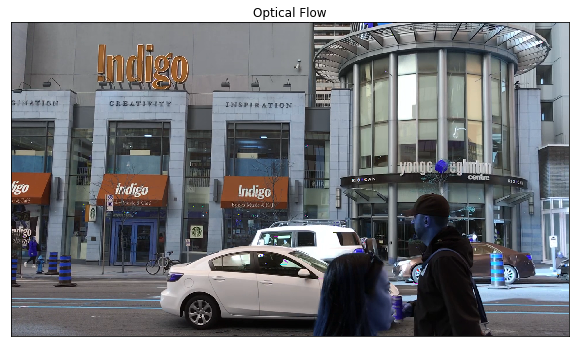

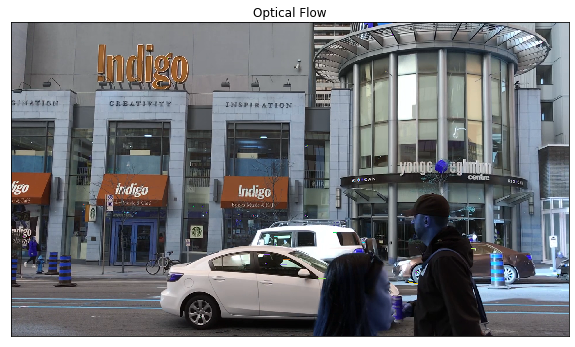

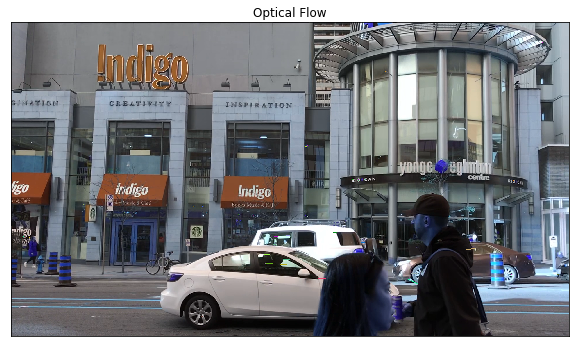

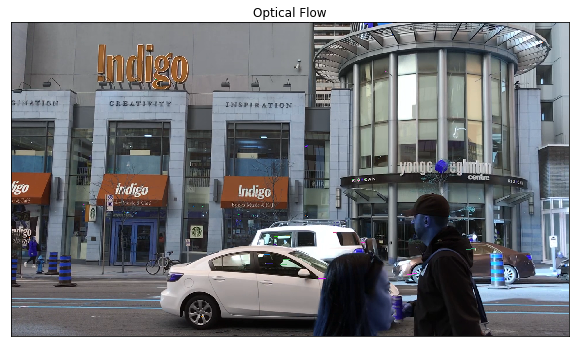

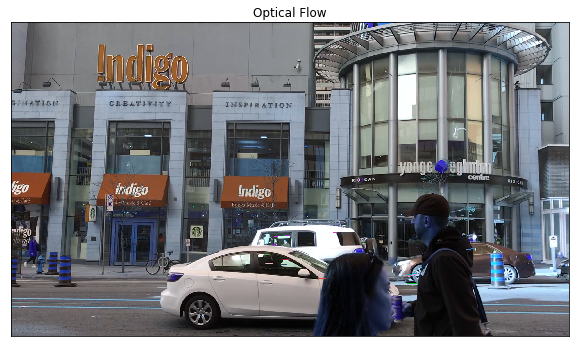

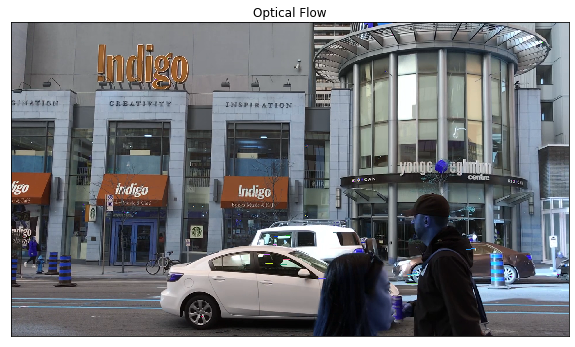

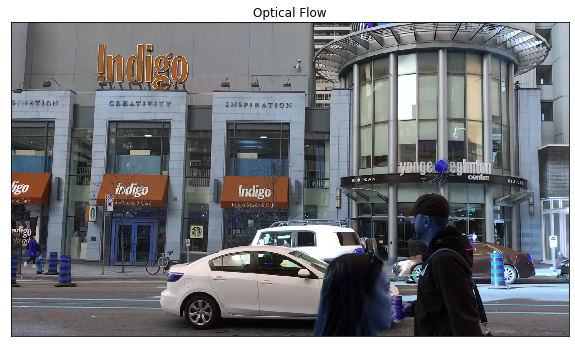

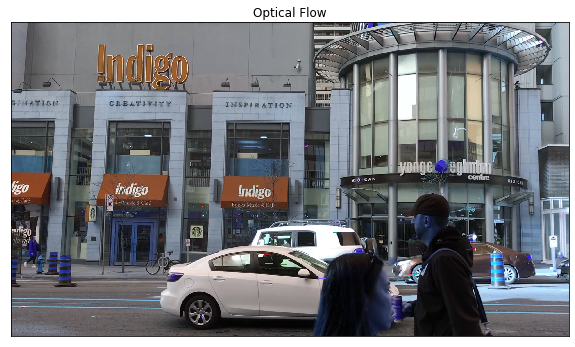

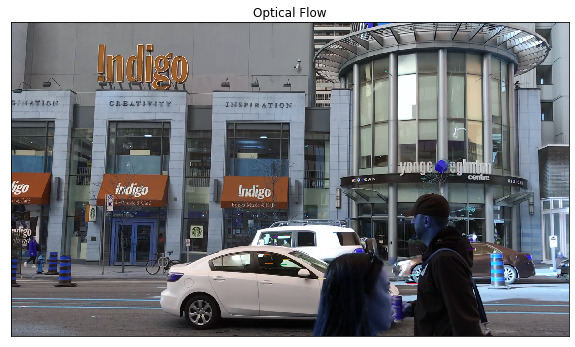

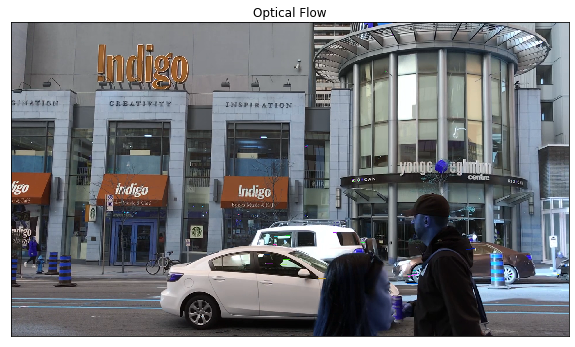

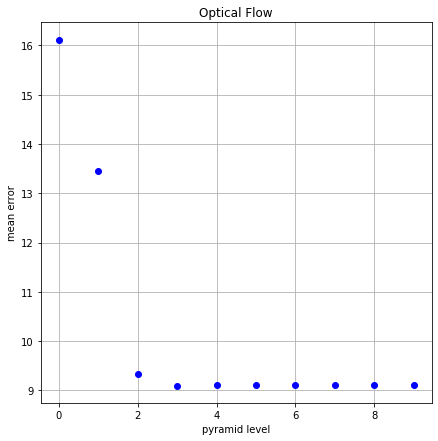

In [36]:
# This part was done b y the help of tutorial

# Loading images
img1 = cv2.imread("frame1.png")
img2 = cv2.imread("frame2.png")

# converting to grayscale
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# parameters for ShiTomasi corner detection
feature_params = dict( maxCorners =500,
                       qualityLevel = 0.5,
                       minDistance = 5,
                       blockSize = 5 )

errors =[]
for i in range (10):
    # parameters for lucas kanade optical flow
    lk_params = dict( winSize = (20,20),
                      maxLevel = i,
                      minEigThreshold = 0,#0.001,
                      criteria = (cv2.TERM_CRITERIA_COUNT | cv2.TERM_CRITERIA_EPS,10, 0.1),
                      )

   
    p0 = cv2.goodFeaturesToTrack(img1_gray, **feature_params)


    # compute optic flow
    p1, st, err = cv2.calcOpticalFlowPyrLK(img1_gray, img2_gray, p0, None, **lk_params)

    # select good points
    good_new = p1[st==1]
    good_old = p0[st==1]


    # create some random colors
    color = np.random.randint(0, 255, (good_new.shape[0], 3))

    # create a mask image for drawing purposes
    mask = img1.copy()

    # draw the tracks
    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        mask = cv2.line(mask, (a,b), (c,d), color[i].tolist(), 2)
        
    #Display optical flow image
    plt.figure(figsize=(10,10))
    plt.imshow(mask)
    plt.title("Optical Flow"), plt.xticks([]), plt.yticks([])
    plt.show()


    error_mu = np.array(err).mean()
    errors = np.append(errors, error_mu)
        
#display pyramid level vs mean error
maxLevel = np.arange(10)

# display images
plt.figure(figsize=(7,7))
plt.plot(maxLevel, errors,'bo')
plt.title("Optical Flow")
plt.xlabel('pyramid level')
plt.ylabel('mean error')
plt.grid('on')
plt.show()

